What we are going to do in this kernel 

1. Understand the problem:
We will look at each variable and do a philosophical analysis about their meaning and importance for the problem.

2. Univariable study:
We will just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3. Multivariate study:
We will try to understand how the dependent variable and independent variables relate.

4. Basic cleaning:
We will clean the dataset and handle the missing data, outliers and categorical variables.

5. Test assumptions:
we will check if our data meets the assumptions required by most multivariate techniques.
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('E:\\New folder\\House Price Prediction\\train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

* Variable:
Variable name

* Type :
Identification of the variables type. There are two possible values for this field:
(i) numerical
(ii) categorical
we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

* Segment:
Identification of the variables segment. We can define three possible segments: 
(i) building
(ii) space
(iii)location

we say building, we mean a variable that relates to the physical characteristics of the building.(e.g. 'OverallQual')

we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF')

we say a 'location', we mean a variable that gives information about the place where the house is located
('Neighborhood')

* Expectation:
Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium', and 'Low' as possible values.

* Conclusion:
our conclusoins about the importance of the variable, after we give a quick look at data. we can keep with 
the same categorical scale as in 'Expectation'.

* Comments:
Any general comments that occured to us.



While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? ( e.g. when we think about the house of our dreams, do we care about its 'Masonry veneer type'?).

* if so, how important would this variable be?(e.g. what is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).

* is this information already described in any other variable? (e.g. if 'LandContour' gives the flatness o f the property, do we really need to know the 'LandSlope'?).

I went through this process and concluded that the following variables can play an important role in this problem:

* 


2. First things first: Analyzing 'SalePrice'

'SalePrice' is the reason for our quest. It's like when are going to a party. We always have a reason to be there. Usually, women

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It seems that minimum price is larger than zero. So it doesn't have any traits that would destroy the model.

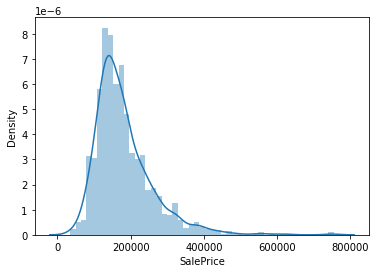

In [6]:
#histogram
sns.distplot(df_train['SalePrice']);

We can see the above histogram

* Deviate from the normal distribution
* Have appreciable positive skewness
* Show peakedness


In [7]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Relationship with numerical variables


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

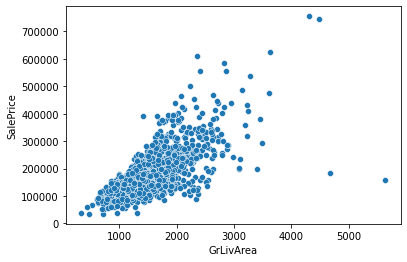

In [8]:
#scatter plot grlivarea/saleprice

sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

It seems that 'SalePrice' and 'GrLivArea' have positive linear relationship.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

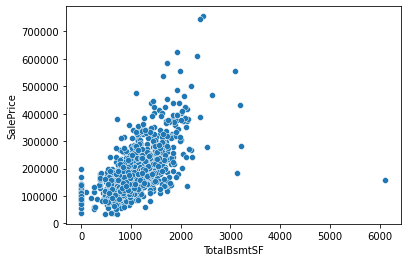

In [9]:
#scatter plot totalbsmtsf/saleprice

sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df_train)

Relationship with categorical features


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

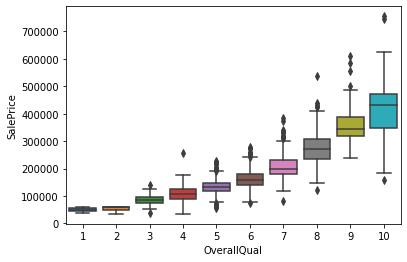

In [10]:
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

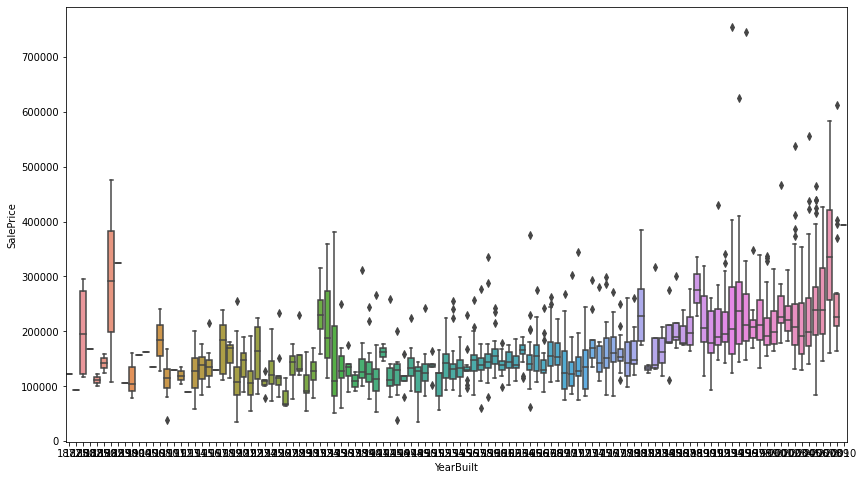

In [11]:
plt.subplots(figsize=(14,8))
sns.boxplot(x='YearBuilt',y='SalePrice',data=df_train)

we can conclude that:

-'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationship are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

-'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

* We just analysed four variables, but there are many other that we should analyze. The trick here seems to be the choice of the right features(Feature Selection) and not the definition of complex relationships between them (feature engineering).



Keep calm and work smart

Until now we just followed our intution and analyzed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective. We are going to do more objective analysis.



The 'Plasma soup'

We will start with some practical receipes to make sense

* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* scatter plots between the most correlated variables(move like Jagger style).


Correlation matrix (heatmap style)

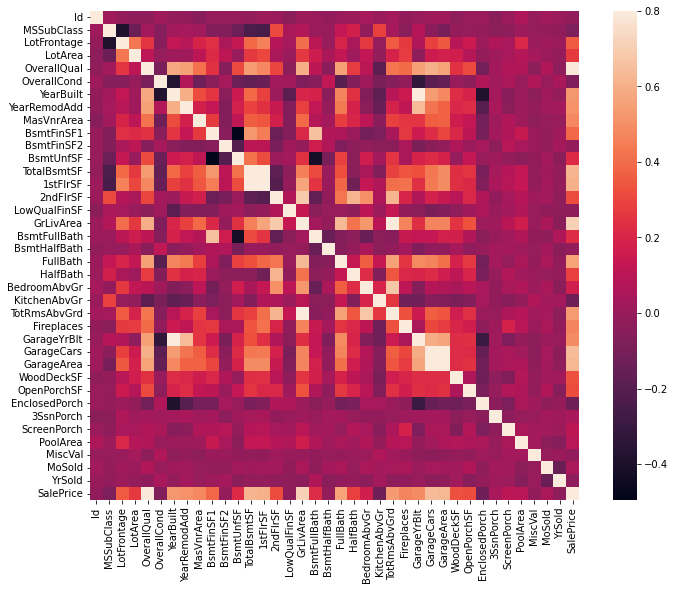

In [12]:
#correlation matrix

plt.subplots(figsize=(12,9))
sns.heatmap(df_train.corr(),vmax=.8,square=True);

At first sight, there are two red colored quares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. if we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi'. but we can also see many other variables that should be taken into account.

'SalePrice' correlation matrix (zoomed heatmap style)

<AxesSubplot:>

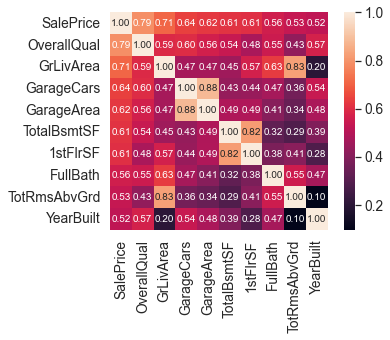

In [13]:
k=10
cols=df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual','GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You will never be able to distinguish them. 

* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right.

* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again, is this dataset from Chernobyl?

* 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, It scares me to think about 'YearBuild' because I start feeling that we should do a little bit of time-series analysis to get this right.

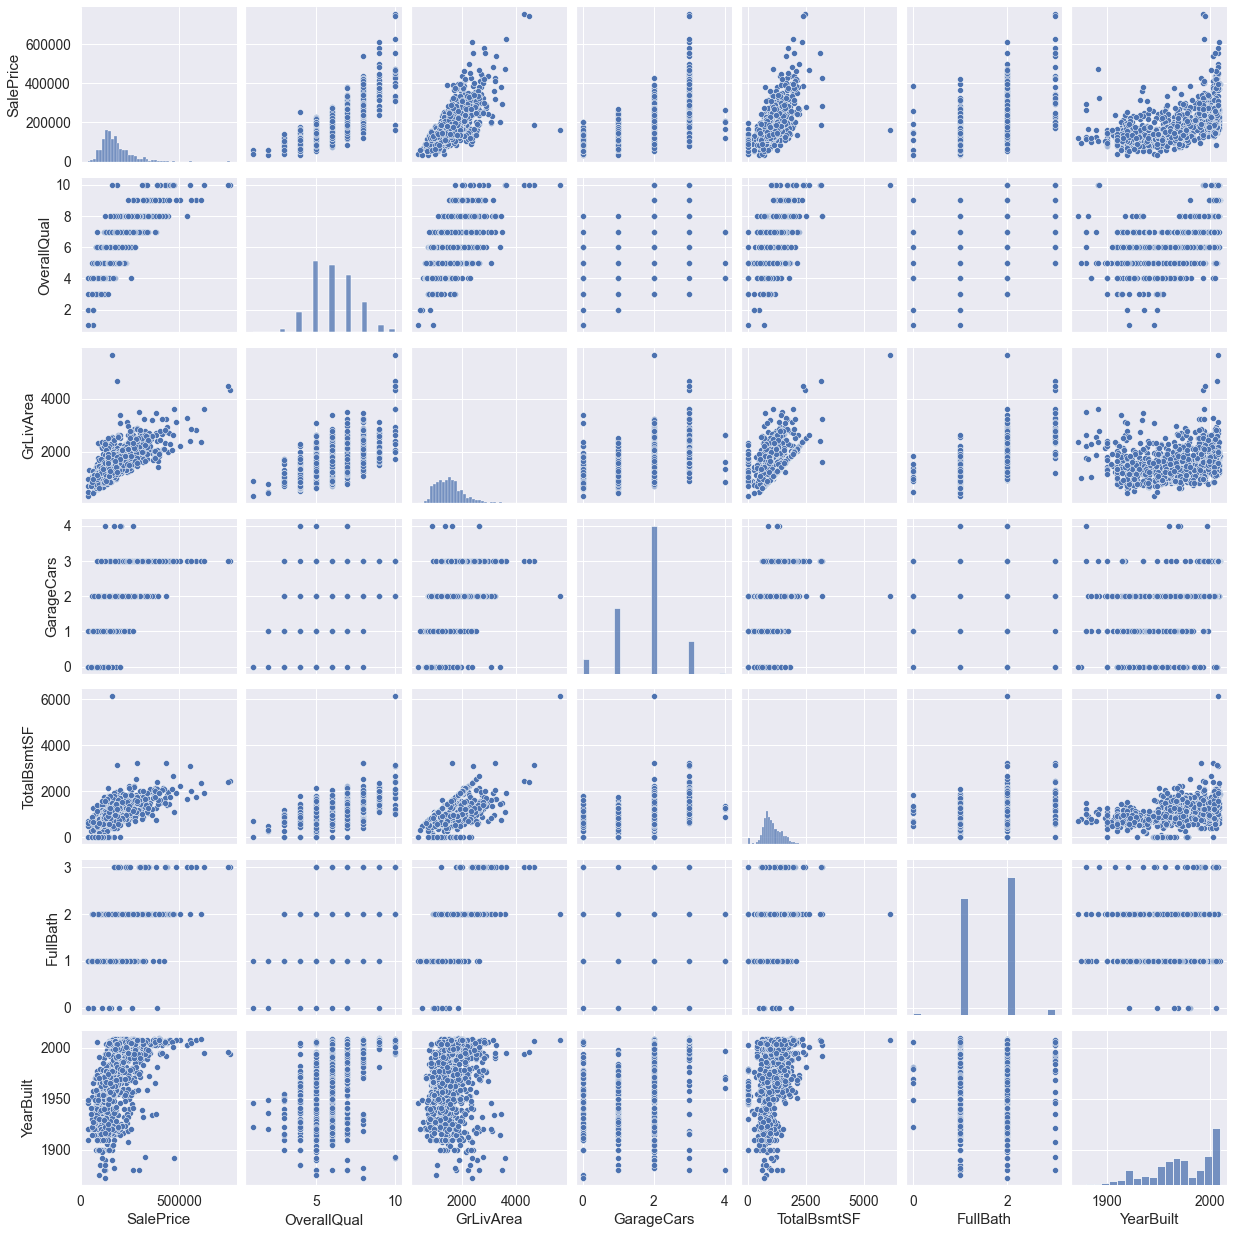

In [14]:
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

Although we already know some of the main figures, this mega scatter plot gives as reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figures, we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area(unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function. We can also see this same tendency in the upper limit of the 'dots cloud'. Notice how the set of dots regarding the last years tend to stay above this limit.

4. Missing Data

Important questions when thinking about missing data:
    
*How prevalent is the missing data?
*is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantiative perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [15]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)



,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how handle the missing data.
we'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed
This means that we will not try to any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC','MiscFeature','Alley',etc) that we should deletee. The point is: will we miss this data? I don't think so.None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house. Moreover, looking closer at the variables, we could say that variables like 'PoolQC','MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data.Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables.The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'.Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to  handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll  just delete the observation with missing data.

In [16]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

Outliers:

Outliers is also something that we should be aware of . Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

Univariate analysis
The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data.In this context, data standardization means converting data values to have mean of 0 and standard deviation of 1. 




Bivariate analysis


We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. 

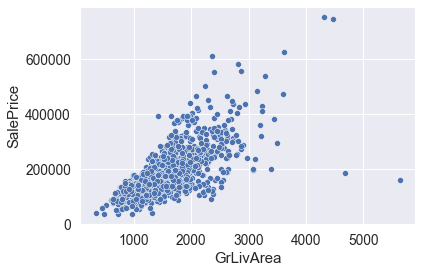

In [17]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train);

What has been revealed:
The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

The two observation in the top of plot are those 7. something observations that we said we should be careful about. They look two special cases, however they seem to be following the trend. for that reason, we will keep them.


In [18]:
#deleting points
df_train.sort_values(by='GrLivArea',ascending=False)[:2]
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)

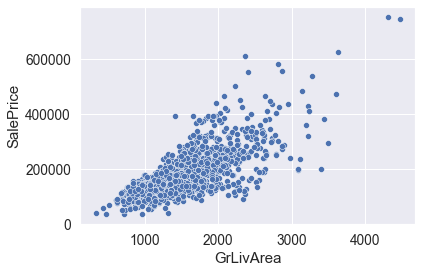

In [19]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train);

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

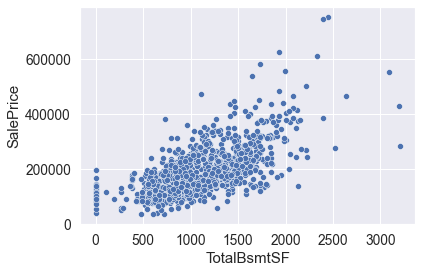

In [20]:
#bivariate analysis saleprice/TotalBsmtSF

sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df_train)

we can feel tempted to eliminate some observation(e.g. TotalBsmtSF>3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

Getting hard core

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'.Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

Normality- When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this(e.g. t-statistics). In this excercise we'll just check univariate normality for 'SalePrice'(which is a limited approach).Remember that univariate normality doesn't ensure multivariate normality(which is what we would like to have), but it helps. Another detail to take into account is that in big samples(>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems(e.g. heteroscedacity).So that is the main reason why we are doing this analysis.


The point here is to test 'SalePrice' in a very lean way. We will do this paying attention to

-Histogram: Kurtosis and skewness.

-Normal probablity plot: Data distribution should closely

follow the diagonal that represents the normal distribution.

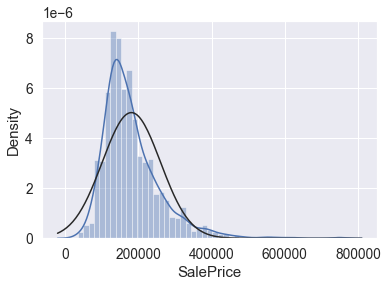

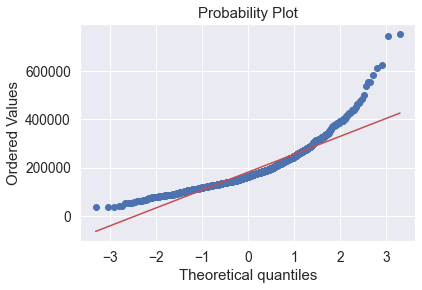

In [21]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything is not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. 

In [22]:
#apply log transformation

df_train['SalePrice'] = np.log(df_train['SalePrice'])

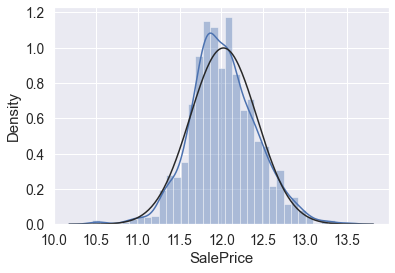

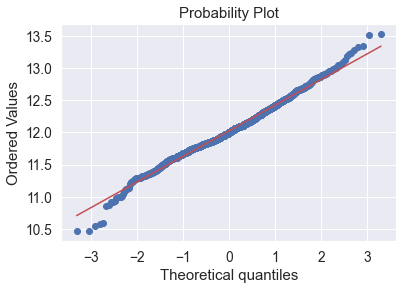

In [23]:
#transformed histogram and normal probability plot

sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

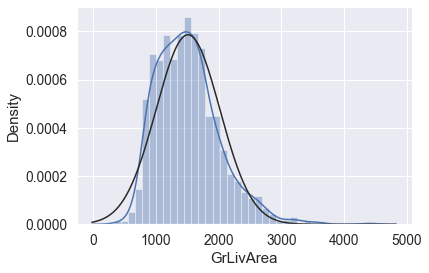

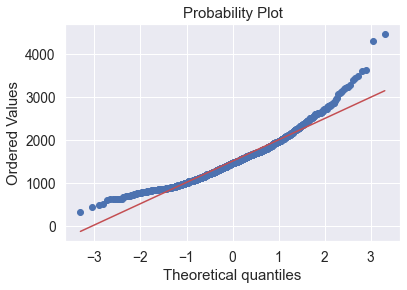

In [24]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [25]:
#apply log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

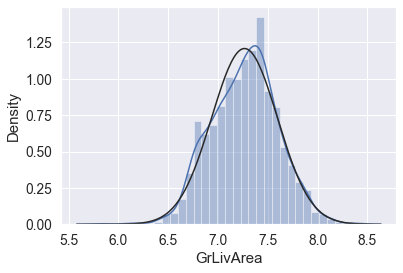

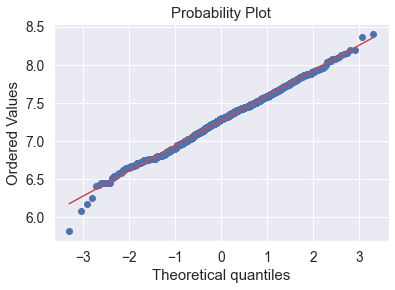

In [26]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

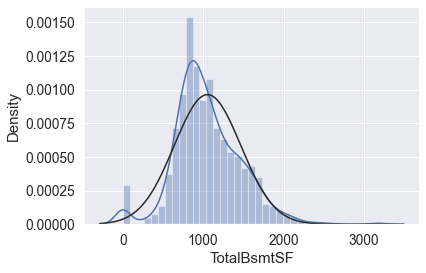

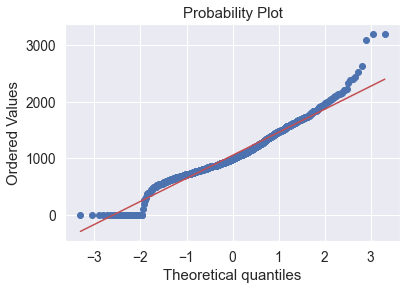

In [27]:
# histogram and normal probablity plot

sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Now we are dealing with the big boss. what do we have here.

--something that , in general, present skewness.

--A significant number of observation with value zero(houses without basement).

--A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we will create a variable that can get the effect of having or not having basement(binary variable). Then, we will do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not having basement.

In [28]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [29]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

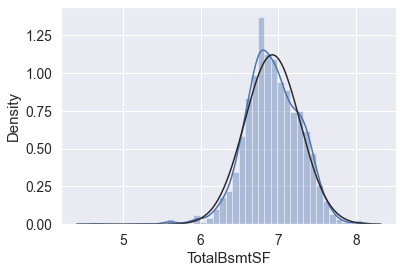

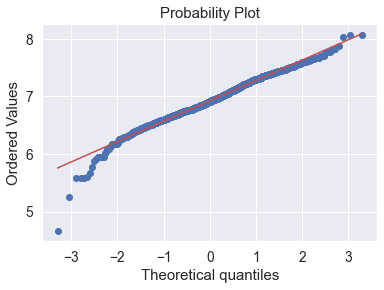

In [30]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds ( a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'

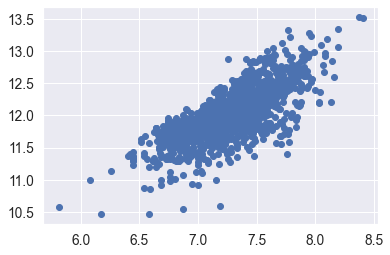

In [31]:
#scatter plot

plt.scatter(df_train['GrLivArea'],df_train['SalePrice']);

Older versions of this scatter plot(previous to log transformed),had a conic shape(go back and check 'scatter plots between 'SalePrice' and  correlated variables (move like jagger style). As you can see, the current scatter plto does not have a conic shape anymore. That is the power of normality! just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

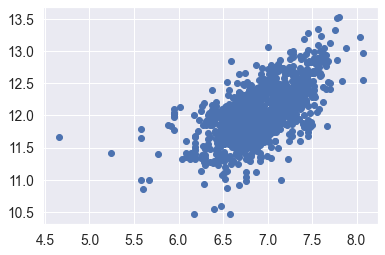

In [32]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

we can say that, In general 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtF'

Dummy Variables

In [33]:
df_train = pd.get_dummies(df_train)

Conclusion
We analysed 'SalePrice' alone and with the most correlated variables, we dealth with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorical variables into dummy variables.
